In [38]:
import pandas as pd

# Load cleaned notion weight CSV
n_df = pd.read_csv("./data/notion_weight_cleaned.csv")

# Load the MyFitnessPal CSV
mfp_df = pd.read_csv('./data/myfitnesspal-weight.csv')

# Standardize column names
mfp_df.columns = mfp_df.columns.str.lower()
n_df.columns = n_df.columns.str.lower()

# Convert date to datetime
mfp_df['date'] = pd.to_datetime(mfp_df['date'], errors='coerce')
n_df['date'] = pd.to_datetime(n_df['date'], errors='coerce')

# Optional: Drop any rows with missing dates or weights
mfp_df = mfp_df.dropna(subset=['date', 'weight'])
n_df = n_df.dropna(subset=['date', 'weight'])

# Sort (optional, but good practice)
mfp_df = mfp_df.sort_values('date').reset_index(drop=True)
n_df = n_df.sort_values('date').reset_index(drop=True)

mfp_df.head()


,date,weight
0,2015-05-22,79.8
1,2016-09-27,79.5
2,2020-03-12,74.5
3,2020-03-23,73.5
4,2020-03-30,73.0


In [39]:
# Combine both datasets into one
combined_weights = pd.concat([n_df, mfp_df], ignore_index=True)

# Drop duplicates just in case
combined_weights = combined_weights.drop_duplicates(subset='date')

# Sort by date
combined_weights = combined_weights.sort_values('date').reset_index(drop=True)


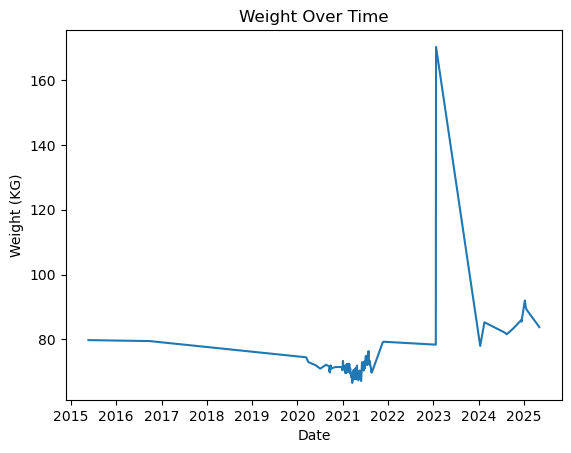

In [40]:
import matplotlib.pyplot as plt

plt.plot(combined_weights['date'], combined_weights['weight'])
plt.xlabel("Date")
plt.ylabel("Weight (KG)")
plt.title("Weight Over Time")
plt.show()


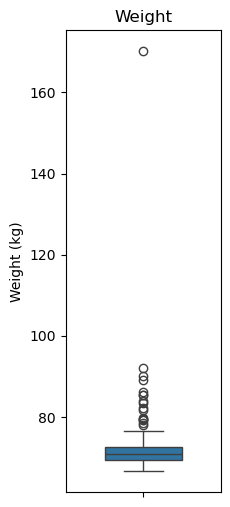

In [41]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(2, 6)) 

sns.boxplot(y="weight", data=combined_weights, ax=ax, width=0.5)

ax.set_title("Weight")
ax.set_ylabel("Weight (kg)")

plt.show()


In [42]:
# What is the outlier weight?
outlier_weight = combined_weights["weight"].max()
# 170.2
# This is far very likely an incorrect unit issue
# 1lb = 0.453kg
outlier_weight_kg = outlier_weight * 0.453

# Change the outlier weight
combined_weights.loc[combined_weights["weight"] == outlier_weight, "weight"] = 77.1

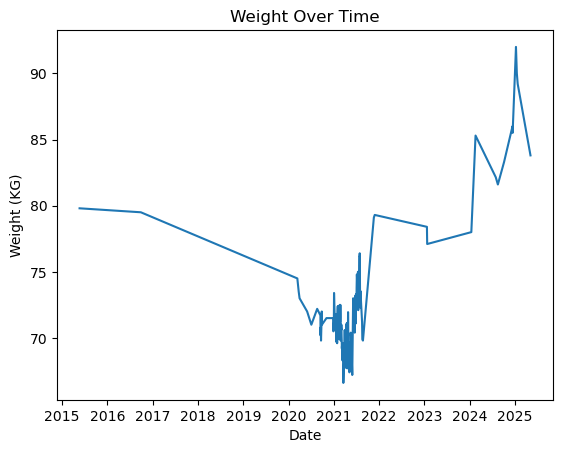

In [43]:
plt.plot(combined_weights['date'], combined_weights['weight'])
plt.xlabel("Date")
plt.ylabel("Weight (KG)")
plt.title("Weight Over Time")
plt.show()

In [44]:
# Save combined data
combined_weights.to_csv('./data/combined_weight_data.csv', index=False)